In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report
# for balance labels
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import cv2
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)
from skimage import color

%matplotlib inline

In [2]:
mypath = '/Users/yinzi/Downloads/UTKFace'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)
df['age']= df['age'].astype('int')
df['gender']= df['gender'].astype('int')
df['race']= df['race'].astype('int')

# put the age in different interval
df['age']=np.where(((df.age>=1) & (df.age<=2)), 0, df.age)
df['age']=np.where(((df.age>=3) & (df.age<6)), 1, df.age)
df['age']=np.where(((df.age>=6) & (df.age<9)), 2, df.age)
df['age']=np.where(((df.age>=9) & (df.age<12)), 3, df.age)
df['age']=np.where(((df.age>=12) & (df.age<21)), 4, df.age)
df['age']=np.where(((df.age>=21) & (df.age<36)), 5, df.age)
df['age']=np.where(((df.age>=36) & (df.age<51)), 6, df.age)
df['age']=np.where(((df.age>=51) & (df.age<80)), 7, df.age)
df['age']=np.where((df.age>=80), 8, df.age)

In [3]:
df.head()

,age,gender,race,file
0,3,1,2,/Users/yinzi/Downloads/UTKFace/9_1_2_201612192...
1,6,0,1,/Users/yinzi/Downloads/UTKFace/36_0_1_20170117...
2,8,1,0,/Users/yinzi/Downloads/UTKFace/86_1_0_20170120...
3,5,1,0,/Users/yinzi/Downloads/UTKFace/26_1_0_20170116...
4,0,1,2,/Users/yinzi/Downloads/UTKFace/1_1_2_201612191...


In [172]:
df1 = df.values
X = df1[:, 3:4]
y1 = df1[:, 0]

In [173]:
X[0:5], type(X)

(array([['/Users/yinzi/Downloads/UTKFace/9_1_2_20161219204347420.jpg.chip.jpg'],
        ['/Users/yinzi/Downloads/UTKFace/36_0_1_20170117163203851.jpg.chip.jpg'],
        ['/Users/yinzi/Downloads/UTKFace/86_1_0_20170120225751953.jpg.chip.jpg'],
        ['/Users/yinzi/Downloads/UTKFace/26_1_0_20170116171048641.jpg.chip.jpg'],
        ['/Users/yinzi/Downloads/UTKFace/1_1_2_20161219154612988.jpg.chip.jpg']],
       dtype=object),
 numpy.ndarray)

In [174]:
y1[0:5], type(y1)

(array([3, 6, 8, 5, 0], dtype=object), numpy.ndarray)

In [175]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.30, random_state=42)
# train and validation dataset split
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [176]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((16593, 1), (16593,), (7112, 1), (7112,))

In [177]:
X_train_2.shape, y_train_2.shape, X_val.shape, y_val.shape

((12444, 1), (12444,), (4149, 1), (4149,))

In [178]:
X3, y3 = X_train_2, y_train_2

In [179]:
y3 = LabelEncoder().fit_transform(y3)
# summarize distribution
#counter = Counter(y3)
#for k,v in counter.items():
    #per = v / len(y3) * 100
    #print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# transform the dataset
oversample = RandomOverSampler()
X3, y3 = oversample.fit_resample(X3, y3)
# summarize distribution
counter = Counter(y3)
for k,v in counter.items():
    per = v / len(y3) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=5, n=5394 (11.111%)
Class=7, n=5394 (11.111%)
Class=6, n=5394 (11.111%)
Class=4, n=5394 (11.111%)
Class=8, n=5394 (11.111%)
Class=1, n=5394 (11.111%)
Class=3, n=5394 (11.111%)
Class=0, n=5394 (11.111%)
Class=2, n=5394 (11.111%)


In [180]:
X3[0:5], type(X3), X3.shape

(array([['/Users/yinzi/Downloads/UTKFace/22_1_2_20170116165351984.jpg.chip.jpg'],
        ['/Users/yinzi/Downloads/UTKFace/68_0_0_20170111221718605.jpg.chip.jpg'],
        ['/Users/yinzi/Downloads/UTKFace/45_0_2_20170116164410975.jpg.chip.jpg'],
        ['/Users/yinzi/Downloads/UTKFace/23_1_0_20170116221719806.jpg.chip.jpg'],
        ['/Users/yinzi/Downloads/UTKFace/69_1_0_20170110141848983.jpg.chip.jpg']],
       dtype=object),
 numpy.ndarray,
 (48546, 1))

In [181]:
y3[0:5], type(y3), y3.shape

(array([5, 7, 6, 5, 7]), numpy.ndarray, (48546,))

In [182]:
X4 = X3[:,0]
len(X4)

48546

In [183]:
X4[0:5], type(X4), X4.shape

(array(['/Users/yinzi/Downloads/UTKFace/22_1_2_20170116165351984.jpg.chip.jpg',
        '/Users/yinzi/Downloads/UTKFace/68_0_0_20170111221718605.jpg.chip.jpg',
        '/Users/yinzi/Downloads/UTKFace/45_0_2_20170116164410975.jpg.chip.jpg',
        '/Users/yinzi/Downloads/UTKFace/23_1_0_20170116221719806.jpg.chip.jpg',
        '/Users/yinzi/Downloads/UTKFace/69_1_0_20170110141848983.jpg.chip.jpg'],
       dtype=object),
 numpy.ndarray,
 (48546,))

In [184]:
dfbalanced = pd.DataFrame({'file1':X4, 'age1': y3})
dfbalanced.head()

,file1,age1
0,/Users/yinzi/Downloads/UTKFace/22_1_2_20170116...,5
1,/Users/yinzi/Downloads/UTKFace/68_0_0_20170111...,7
2,/Users/yinzi/Downloads/UTKFace/45_0_2_20170116...,6
3,/Users/yinzi/Downloads/UTKFace/23_1_0_20170116...,5
4,/Users/yinzi/Downloads/UTKFace/69_1_0_20170110...,7


In [185]:
dfbalanced.shape, type(dfbalanced)

((48546, 2), pandas.core.frame.DataFrame)

In [186]:
type(dfbalanced['file1']), type(dfbalanced['age1'])

(pandas.core.series.Series, pandas.core.series.Series)

In [187]:
dfbalanced['age1'].unique()

array([5, 7, 6, 4, 8, 1, 3, 0, 2])

In [188]:
n = int(5000/len(set(dfbalanced.loc[:,'age1'])))
dfbalancedsubset = dfbalanced.groupby('age1', group_keys=False).apply(lambda x: x.sample(n)).sample(frac=1)

In [189]:
dfbalancedsubset.count()

file1    4995
age1     4995
dtype: int64

In [190]:
dfbalancedsubset.head(2)

,file1,age1
32921,/Users/yinzi/Downloads/UTKFace/16_1_0_20170109...,4
43574,/Users/yinzi/Downloads/UTKFace/81_1_0_20170120...,8


In [191]:
dfbalancedsubset['age1'].value_counts()
y_balanced_train = dfbalancedsubset['age1']

In [192]:
gray_images = []
for img_path in dfbalancedsubset['file1']:
    image = plt.imread(img_path)
    img_gray = color.rgb2gray(image)
    gray_images.append(img_gray)

In [193]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

In [194]:
X_train_balanced = np.array(gray_images)
X_train_balanced.shape

(4995, 200, 200)

In [195]:
X_test[0]

array(['/Users/yinzi/Downloads/UTKFace/21_0_2_20170116170741864.jpg.chip.jpg'],
      dtype=object)

In [196]:
X_test1 = X_test[:,0]
X_test1[0:2]

array(['/Users/yinzi/Downloads/UTKFace/21_0_2_20170116170741864.jpg.chip.jpg',
       '/Users/yinzi/Downloads/UTKFace/39_0_4_20170104205430619.jpg.chip.jpg'],
      dtype=object)

In [197]:
len(X_test1)

7112

In [198]:
gray_images_test = []
for img_path in X_test1:
    image = plt.imread(img_path)
    img_gray = color.rgb2gray(image)
    gray_images_test.append(img_gray)

In [199]:
X_test2 = np.array(gray_images_test)
X_test2.shape

(7112, 200, 200)

In [200]:
nimages, nX, ny = X_train_balanced.shape
X_train_balanced = X_train_balanced.reshape((nimages,nX*ny))
nimages, nX, ny= X_test2.shape
X_test2 = X_test2.reshape((nimages,nX*ny))

In [201]:
X_train_balanced.shape, X_test2.shape

((4995, 40000), (7112, 40000))

In [202]:
y_balanced_train.shape, y_test.shape

((4995,), (7112,))

In [203]:
gbc.fit(X_train_balanced,y_balanced_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [204]:
y_pred = gbc.predict(X_test2)

In [209]:
y_pred[0:5], type(y_pred), type(y_pred[0])

(array([5, 6, 5, 6, 6]), numpy.ndarray, numpy.int64)

In [208]:
y_test[0:5], type(y_test)

(array([5, 6, 6, 5, 5], dtype=object), numpy.ndarray)

In [214]:
y_test1 = []
for y in y_test:
    data = int(y)
    y_test1.append(int(data))
y_test1[0:5], type(y_test1)
y_test = np.array(y_test1)
y_test[0:5], type(y_test)

(array([5, 6, 6, 5, 5]), numpy.ndarray)

In [215]:
print(accuracy_score(y_test, y_pred))

0.45683352080989875


In [216]:
print(confusion_matrix(y_test, y_pred))

[[ 397   72   11    3    5   12    1    7    4]
 [  65   74   28    9   17   17    4    6    2]
 [  15   29   32   18   35   21    5    7    2]
 [   8   24   24   17   21   13    5   15    2]
 [   9   14   41   31  155  144   46   35    5]
 [  43   54   45   26  487 1443  632  259   41]
 [   8    7   16   14  111  268  477  239   34]
 [  13   16   17   13   62  134  247  556  143]
 [   0    2    5    1    6   15   14   59   98]]


In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       512
           1       0.25      0.33      0.29       222
           2       0.15      0.20      0.17       164
           3       0.13      0.13      0.13       129
           4       0.17      0.32      0.22       480
           5       0.70      0.48      0.57      3030
           6       0.33      0.41      0.37      1174
           7       0.47      0.46      0.47      1201
           8       0.30      0.49      0.37       200

    accuracy                           0.46      7112
   macro avg       0.36      0.40      0.37      7112
weighted avg       0.52      0.46      0.47      7112



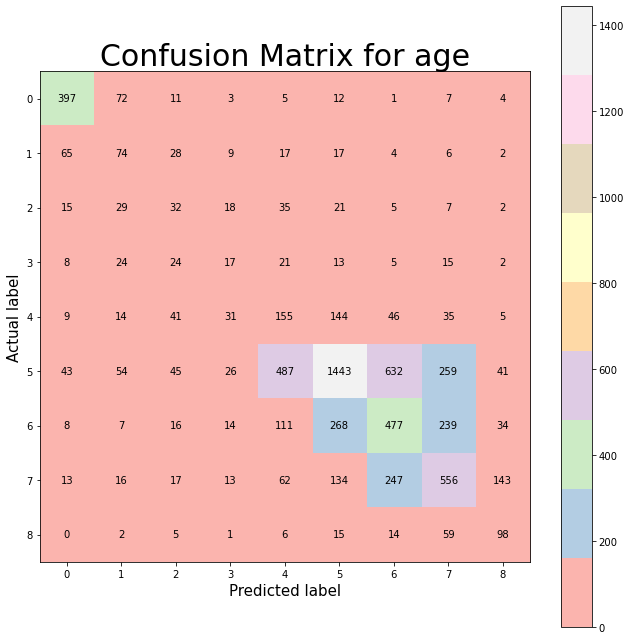

In [222]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix for age', size = 30)
plt.colorbar()
tick_marks = np.arange(9)
#plt.xticks(tick_marks, ["1 infancy (0-2)", "2 Early Childhood (Ages 3-5)", "3 Middle Childhood (Ages 6-8)", "4 Late Childhood (Ages 9-11)", "5 Adolescence (Ages 12-20)", "6 Early Adulthood (Ages 21-35)", "7 Midlife (Ages 36-50)", "8 Mature Adulthood (Ages 51-79)", "9 Late Adulthood (Age 80+)"], rotation=90, size = 10)
#plt.yticks(tick_marks, ["1 infancy (0-2)", "2 Early Childhood (Ages 3-5)", "3 Middle Childhood (Ages 6-8)", "4 Late Childhood (Ages 9-11)", "5 Adolescence (Ages 12-20)", "6 Early Adulthood (Ages 21-35)", "7 Midlife (Ages 36-50)", "8 Mature Adulthood (Ages 51-79)", "9 Late Adulthood (Age 80+)"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')